In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
%cd /content/drive/My Drive/project

/content/drive/My Drive/project


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import test
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
import sklearn.metrics as metrics

In [29]:
df=pd.read_csv('newDi.csv')

In [30]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,265,208,2177,332,1,1.0000,0.0000,0.0000,0
1,3972,330,2660,485,5,1.0000,1.0000,1.0000,0
2,1185,166,1254,177,0,0.0000,0.0000,1.0000,0
3,60304,2248,202968,981,101,1.0000,0.0000,1.0000,0
4,5,21,82,79,0,0.0000,1.0000,1.0000,0


In [31]:
print(df.shape)


df.tail(5)

(6825, 9)


,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
6820,0,0,1,17,0,0.0000,1.0000,1.0000,1
6821,0,1,0,17,0,0.0000,1.0000,1.0000,1
6822,0,0,2,15,0,0.0000,1.0000,1.0000,1
6823,0,0,2,16,0,0.0000,1.0000,1.0000,1
6824,0,0,0,17,0,0.0000,1.0000,1.0000,1


In [32]:
print('Number of rows and columns after removing missing values:', df.shape)



Number of rows and columns after removing missing values: (6825, 9)


In [33]:
stat, p = stats.normaltest(df.Is_Fake)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=23608.121, p=0.000
Data does not look Gaussian (reject H0)


We can also calculate kurtosis and skewness, to determine if the data distribution departs from the normal distribution.

Kurtosis of normal distribution: -1.9987004111370354
Skewness of normal distribution: 0.03604981085892282


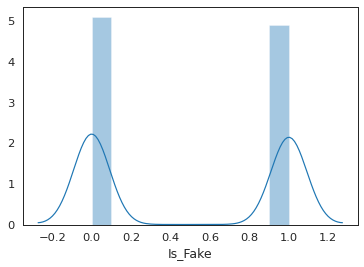

In [34]:
# print(df.Global_active_power.describe())
sns.distplot(df.Is_Fake);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Is_Fake)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Is_Fake)))

### First Time series plot

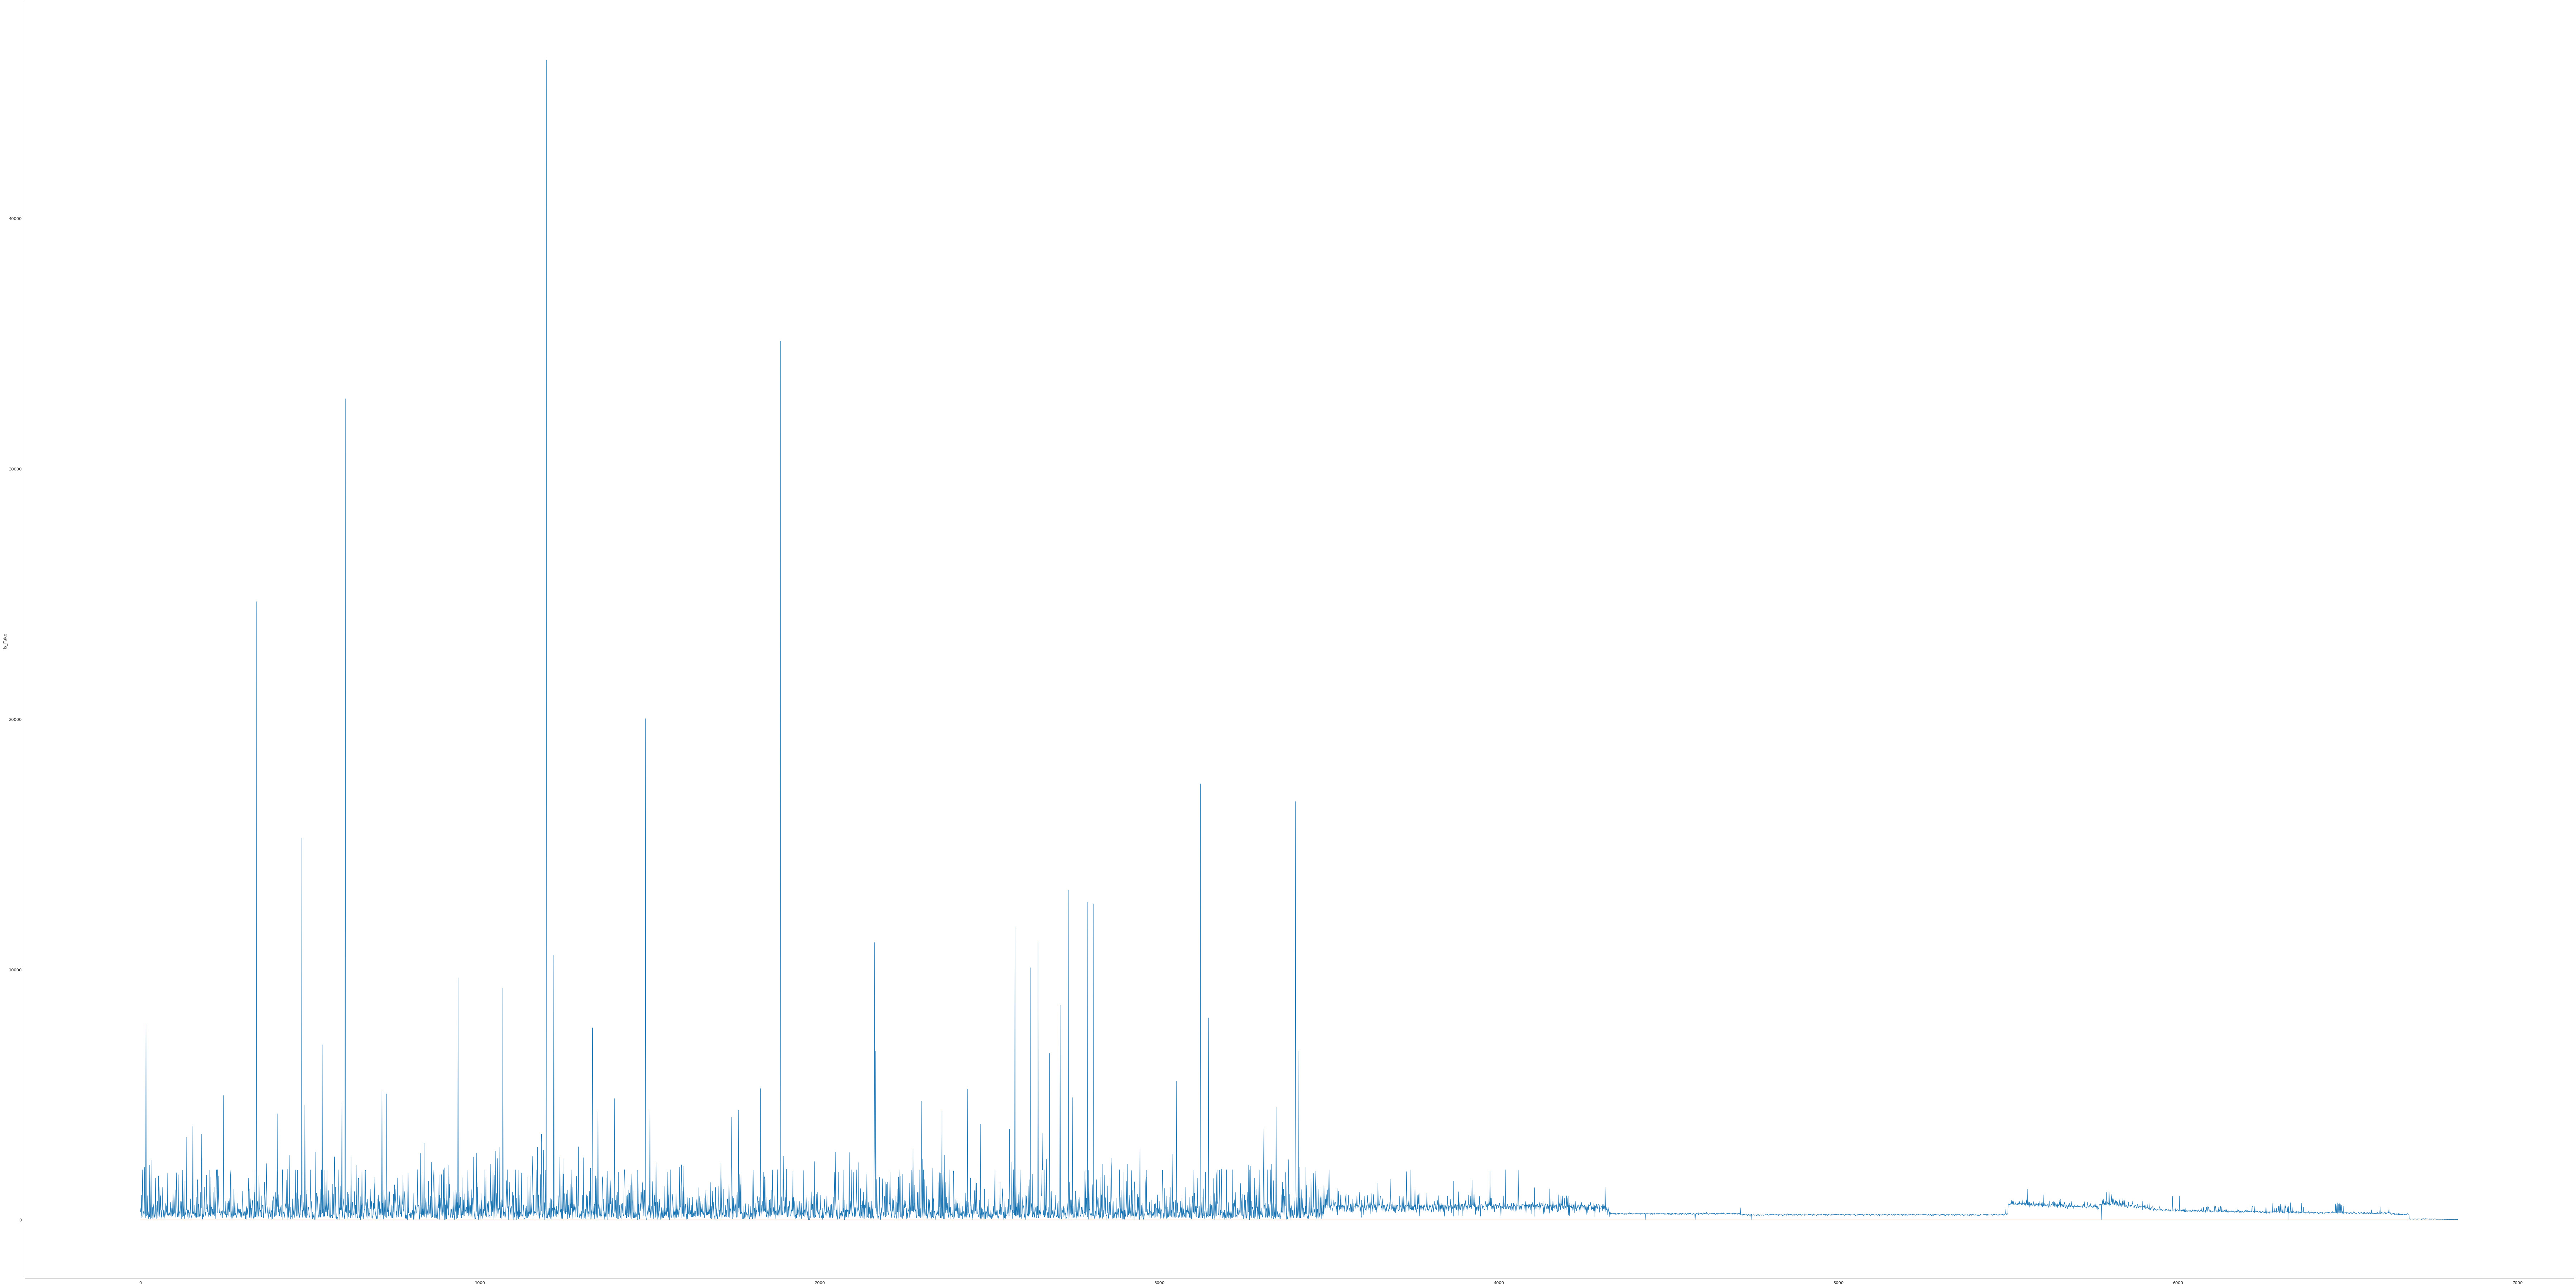

In [35]:
df1=df.loc[:,['friends_count','Is_Fake']]

df1.plot(figsize=(100,50))
plt.ylabel('Is_Fake')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show();

In [36]:
dataset = df.Is_Fake.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [37]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [38]:

look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [39]:
X_train.shape

(5429, 30)

In [40]:
Y_train.shape

(5429,)

In [41]:

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Model Architecture

In [42]:
X_train.shape

(5429, 1, 30)

In [43]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=10, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()


Train on 5429 samples, validate on 1334 samples
Epoch 1/10
5429/5429 [==============================] - 1s 110us/step - loss: 0.0554 - val_loss: 0.0267
Epoch 2/10
5429/5429 [==============================] - 0s 46us/step - loss: 0.0047 - val_loss: 1.0361e-04
Epoch 3/10
5429/5429 [==============================] - 0s 51us/step - loss: 0.0040 - val_loss: 5.6684e-05
Epoch 4/10
5429/5429 [==============================] - 0s 49us/step - loss: 0.0037 - val_loss: 1.4964e-05
Epoch 5/10
5429/5429 [==============================] - 0s 46us/step - loss: 0.0036 - val_loss: 1.5301e-04
Epoch 6/10
5429/5429 [==============================] - 0s 46us/step - loss: 0.0032 - val_loss: 3.8914e-05
Epoch 7/10
5429/5429 [==============================] - 0s 48us/step - loss: 0.0032 - val_loss: 8.1474e-05
Epoch 8/10
5429/5429 [==============================] - 0s 48us/step - loss: 0.0028 - val_loss: 8.6209e-05
Epoch 9/10
5429/5429 [==============================] - 0s 48us/step - loss: 0.0026 - val_loss: 2.3

In [44]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


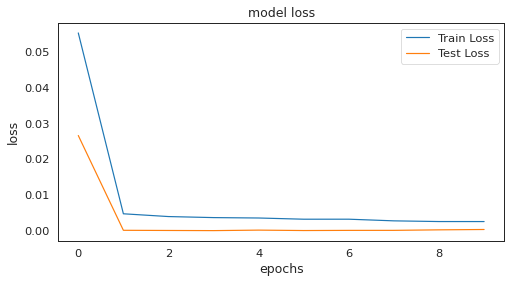

In [45]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();



In [46]:
print("Accuracy:",accuracy_score(Y_test,test_predict))

Accuracy: 00.9710691924
